# Sales Analysis Project — AAL Australia (Q4 2020)

**Author:** Faisal Ahmed  
**Date:** 11/08/2025  

---

## 1. Introduction

This notebook analyzes the sales data of AAL, a clothing brand operating across Australia.  
The objective is to identify high- and low-revenue states, analyze sales trends by demographic groups and time periods, and provide recommendations for sales and marketing strategies.

---

## 2. Data Loading & Wrangling


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\fahme\Downloads\1717583705_sales_datasets\AusApparalSales4thQrt2020.csv")

# Preview data
print(df.head())

# Check missing values
print(df.isna().sum())

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')

# Convert Unit and Sales to numeric
df['Unit'] = pd.to_numeric(df['Unit'], errors='coerce')
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Add time period columns
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())


         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Duplicate rows: 0


---

## 3. Descriptive Statistics

We examine the summary statistics of the key numeric columns: Sales and Units sold.


In [2]:
# Descriptive stats
print(df[['Sales', 'Unit']].describe())

# Additional statistics
print("Sales Mean:", df['Sales'].mean())
print("Sales Median:", df['Sales'].median())
print("Sales Mode:", df['Sales'].mode()[0])
print("Sales Std Dev:", df['Sales'].std())

print("Unit Mean:", df['Unit'].mean())
print("Unit Median:", df['Unit'].median())
print("Unit Mode:", df['Unit'].mode()[0])
print("Unit Std Dev:", df['Unit'].std())


               Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000
Sales Mean: 45013.5582010582
Sales Median: 35000.0
Sales Mode: 22500
Sales Std Dev: 32253.506943966073
Unit Mean: 18.00542328042328
Unit Median: 14.0
Unit Mode: 9
Unit Std Dev: 12.90140277758643


### Box plots to visualize the distribution and identify outliers

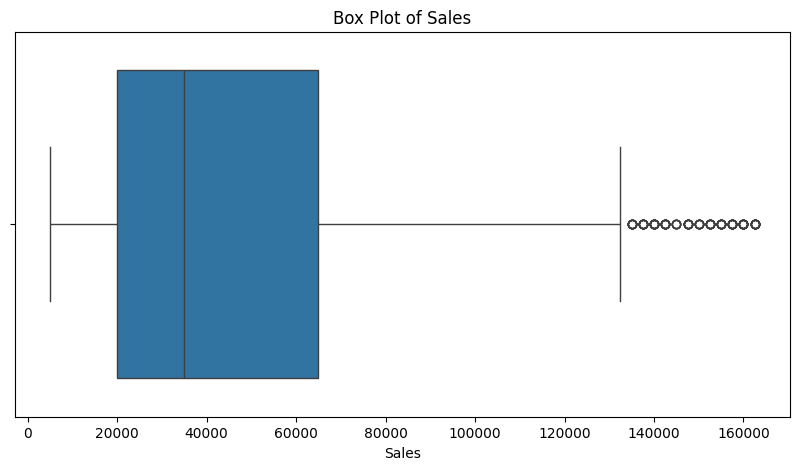

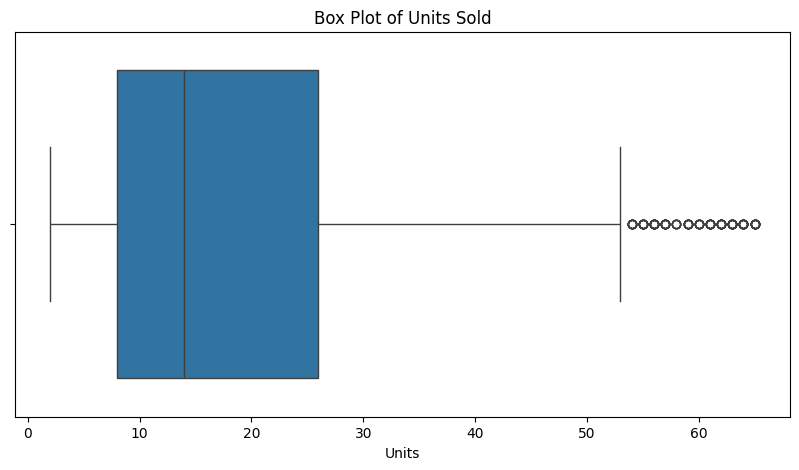

In [3]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Sales'])
plt.title('Box Plot of Sales')
plt.xlabel('Sales')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['Unit'])
plt.title('Box Plot of Units Sold')
plt.xlabel('Units')
plt.show()


### Distribution plots for Sales and Units with KDE


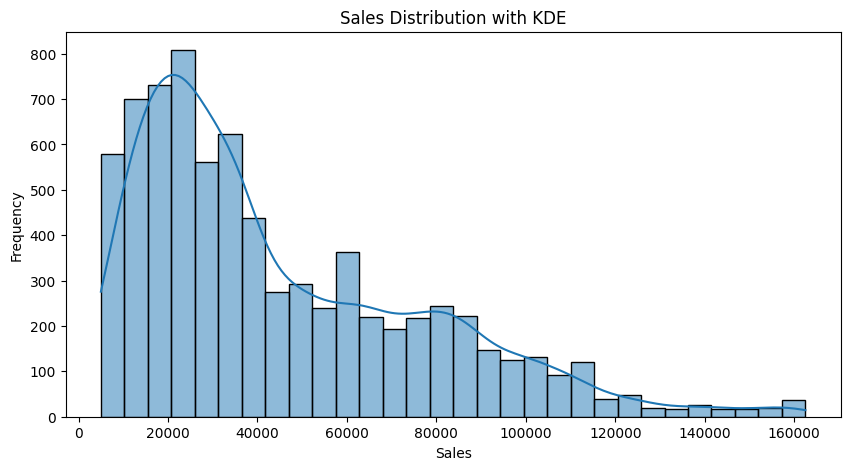

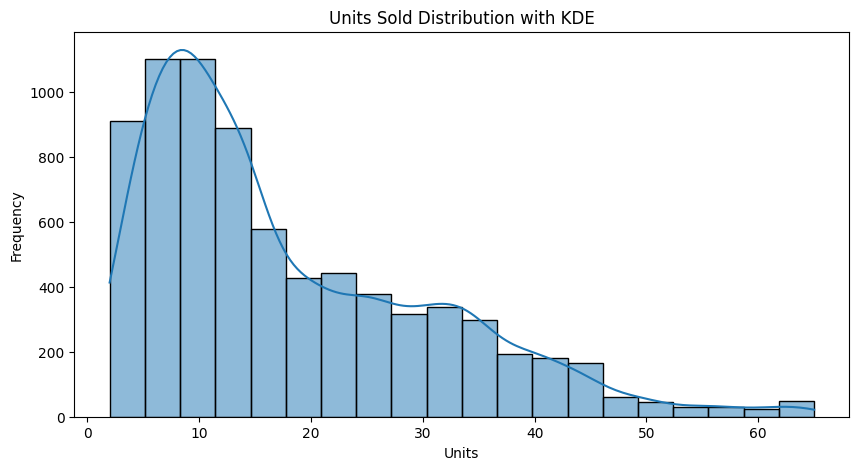

In [4]:
plt.figure(figsize=(10,5))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Sales Distribution with KDE')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['Unit'], kde=True, bins=20)
plt.title('Units Sold Distribution with KDE')
plt.xlabel('Units')
plt.ylabel('Frequency')
plt.show()


---

## 4. Sales Analysis by Group

Identifying the highest and lowest sales groups.


In [5]:
group_sales = df.groupby('Group')['Sales'].sum().sort_values(ascending=False)
print("Total Sales per Group:")
print(group_sales)

print("Highest Sales Group:", group_sales.idxmax(), "with", group_sales.max())
print("Lowest Sales Group:", group_sales.idxmin(), "with", group_sales.min())


Total Sales per Group:
Group
Men        85750000
Women      85442500
Kids       85072500
Seniors    84037500
Name: Sales, dtype: int64
Highest Sales Group:  Men with 85750000
Lowest Sales Group:  Seniors with 84037500


## 5. Time-based Sales Reports
Daily, weekly, monthly, and quarterly sales aggregation.


In [6]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
weekly_sales = df.groupby('Week')['Sales'].sum().reset_index()
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
quarterly_sales = df.groupby('Quarter')['Sales'].sum().reset_index()

print("Daily Sales Sample:")
print(daily_sales.head())

print("Weekly Sales:")
print(weekly_sales)

print("Monthly Sales:")
print(monthly_sales)

print("Quarterly Sales:")
print(quarterly_sales)


Daily Sales Sample:
        Date    Sales
0 2020-10-01  3720000
1 2020-10-02  3715000
2 2020-10-03  3890000
3 2020-10-04  3720000
4 2020-10-05  3862500
Weekly Sales:
    Week     Sales
0     40  15045000
1     41  27002500
2     42  26640000
3     43  26815000
4     44  21807500
5     45  20865000
6     46  21172500
7     47  21112500
8     48  21477500
9     49  29622500
10    50  31525000
11    51  31655000
12    52  31770000
13    53  13792500
Monthly Sales:
   Month      Sales
0     10  114290000
1     11   90682500
2     12  135330000
Quarterly Sales:
   Quarter      Sales
0        4  340302500


### Visualize Sales Trends Over Time


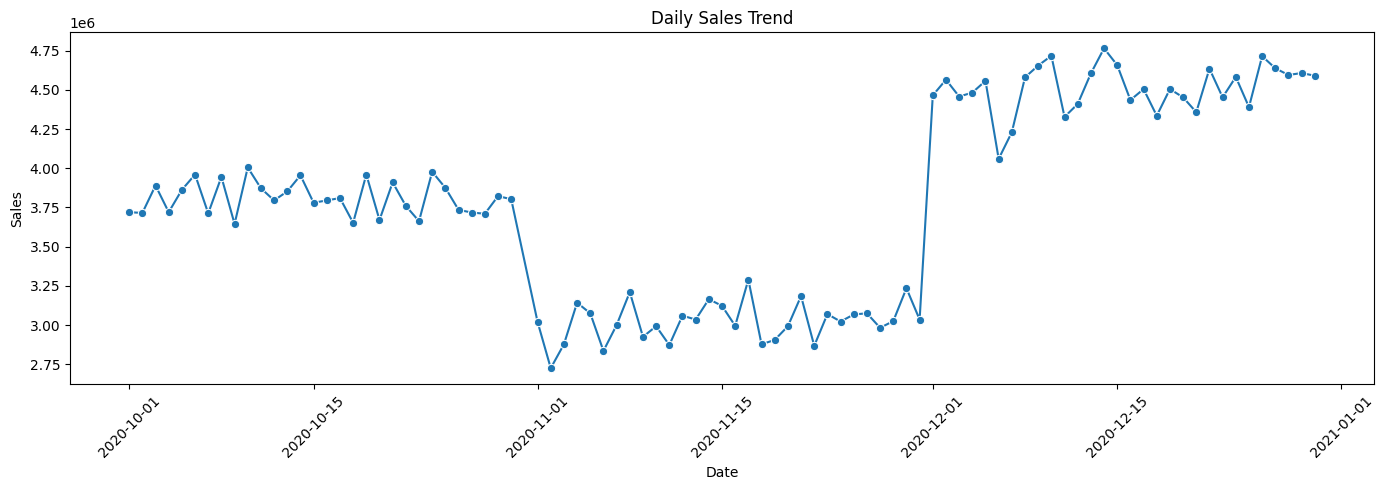

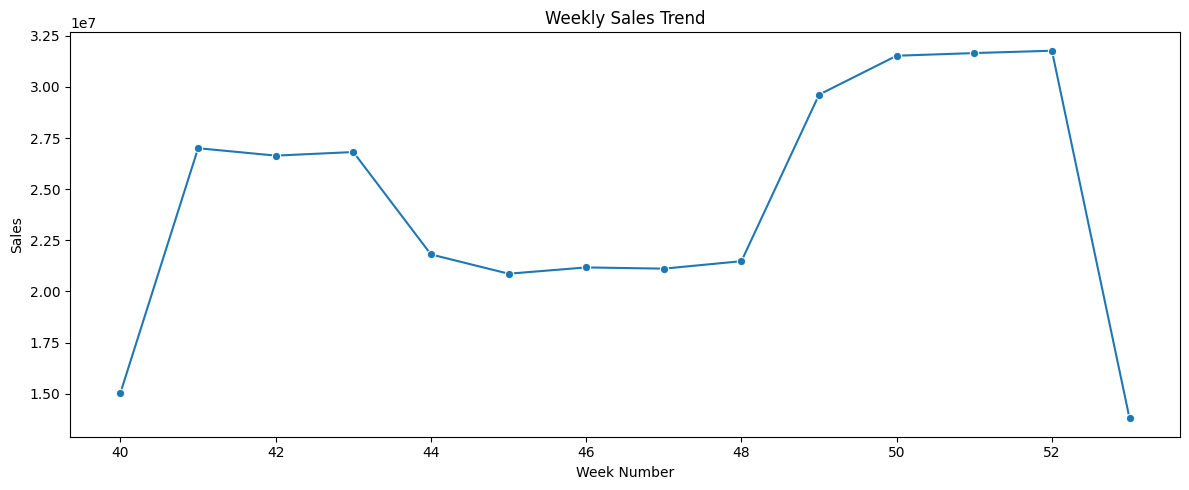

C:\Users\fahme\AppData\Local\Temp\ipykernel_15140\2163345313.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_sales, x='Month', y='Sales', palette='Blues_d')


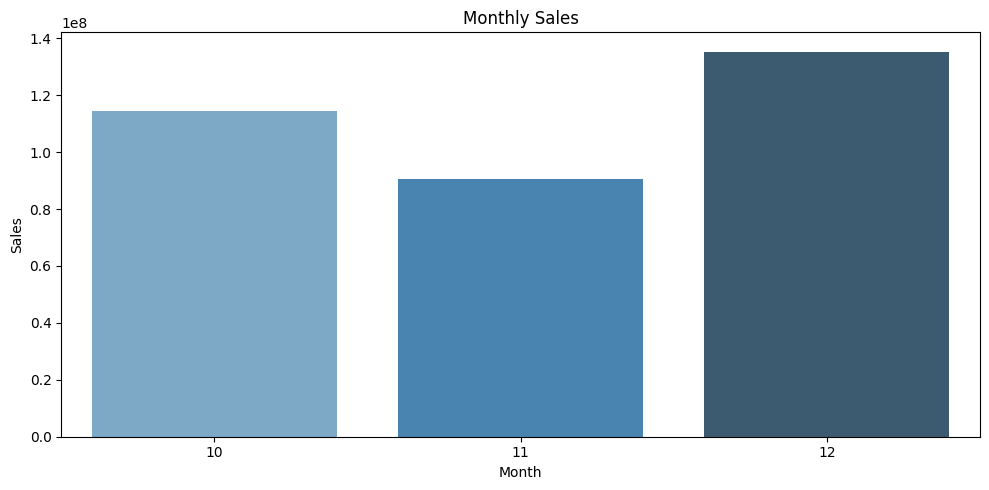

C:\Users\fahme\AppData\Local\Temp\ipykernel_15140\2163345313.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='Quarter', y='Sales', palette='Greens_d')


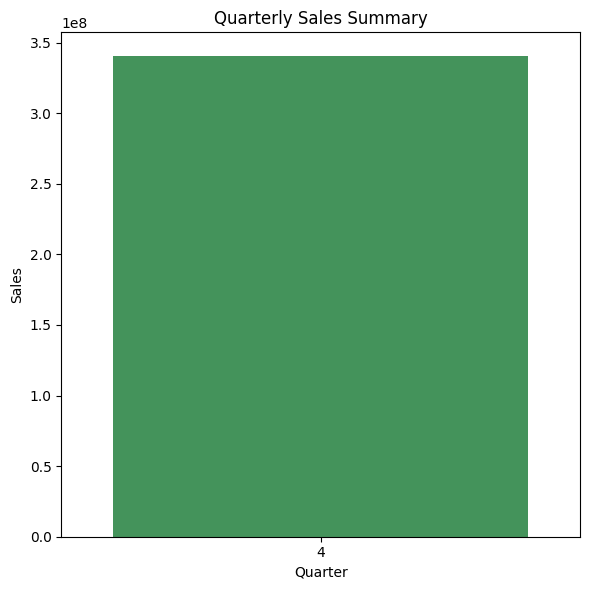

In [7]:
# Daily Sales Trend
plt.figure(figsize=(14,5))
sns.lineplot(data=daily_sales, x='Date', y='Sales', marker='o')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Weekly Sales Trend
plt.figure(figsize=(12,5))
sns.lineplot(data=weekly_sales, x='Week', y='Sales', marker='o')
plt.title('Weekly Sales Trend')
plt.xlabel('Week Number')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10,5))
sns.barplot(data=monthly_sales, x='Month', y='Sales', palette='Blues_d')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Quarterly Sales Summary
plt.figure(figsize=(6,6))
sns.barplot(data=quarterly_sales, x='Quarter', y='Sales', palette='Greens_d')
plt.title('Quarterly Sales Summary')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


## 6. State-wise and Group-wise Sales Analysis


<Figure size 1200x600 with 0 Axes>

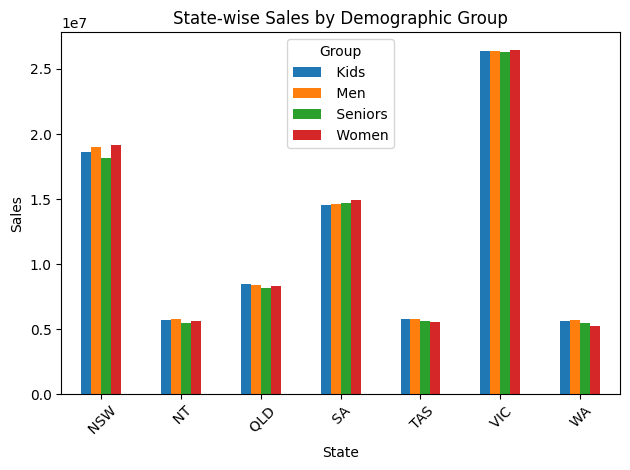

<Figure size 1200x600 with 0 Axes>

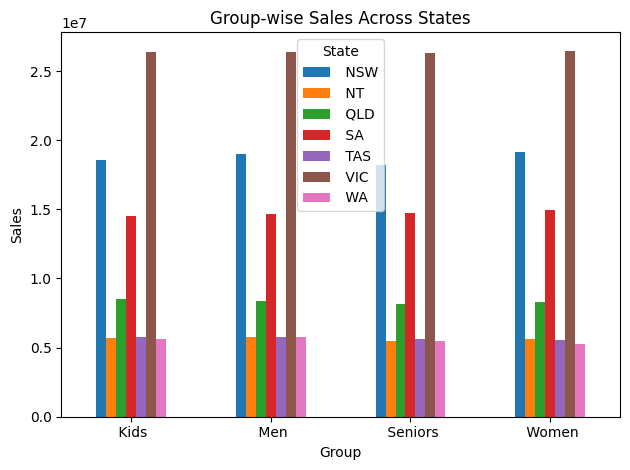

In [8]:
# State-wise sales by Group
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
pivot_state_group = state_group_sales.pivot(index='State', columns='Group', values='Sales')

plt.figure(figsize=(12,6))
pivot_state_group.plot(kind='bar')
plt.title('State-wise Sales by Demographic Group')
plt.ylabel('Sales')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# Group-wise sales across States
group_state_sales = df.groupby(['Group', 'State'])['Sales'].sum().reset_index()
pivot_group_state = group_state_sales.pivot(index='Group', columns='State', values='Sales')

plt.figure(figsize=(12,6))
pivot_group_state.plot(kind='bar')
plt.title('Group-wise Sales Across States')
plt.ylabel('Sales')
plt.xlabel('Group')
plt.xticks(rotation=0)
plt.legend(title='State')
plt.tight_layout()
plt.show()



## 7. Time-of-day Sales Analysis


C:\Users\fahme\AppData\Local\Temp\ipykernel_15140\3317888503.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_sales.index, y=time_sales.values, palette='viridis')


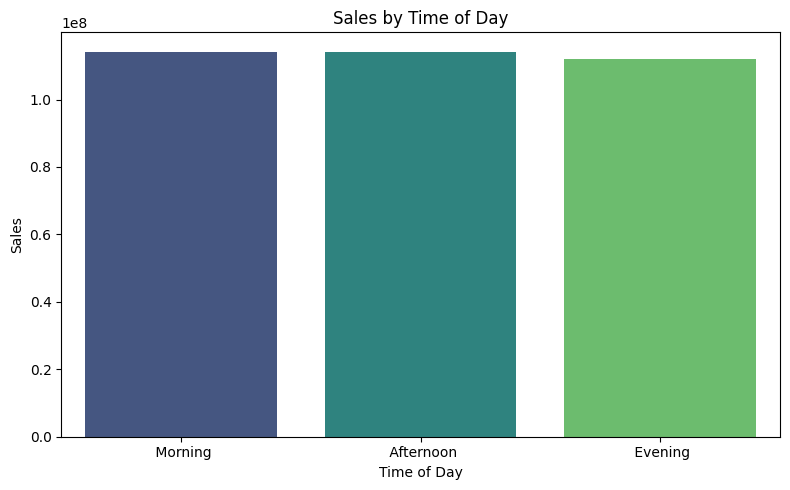

In [9]:
time_sales = df.groupby('Time')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=time_sales.index, y=time_sales.values, palette='viridis')
plt.title('Sales by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


## 8. Recommendations

- The **Men** group drives the highest sales; focus marketing and inventory efforts here.  
- **Seniors** show the lowest sales — explore promotions or customized offers to boost this segment.  
- December is the strongest month; plan promotions and stock accordingly.  
- Peak sales occur in late weeks (50-52), aligning with holiday shopping.  
- Afternoon and Morning sales are significant; consider targeted campaigns during these times.  
- State-wise sales vary — consider state-specific strategies based on demographic preferences.

---

*End of Report*
